In [1]:
#Basic importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [3]:
ts= pd.read_csv('AusAntidiabeticDrug.csv')

In [4]:
ts.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
ts["ds"] = pd.to_datetime(ts["ds"])
print('Shape :',ts.shape)
ts.head()

Shape : (204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


# Problem Case:
John's Manager has gathered some data and asked him to generate insights from the data.
Data set Description:
Total monthly scripts for pharmaceutical products falling under ATC code A10, as recorded by the Australian Health Insurance Commission.
The data is July-1991 to June-2008 and is recorded monthly.
What do you think John should do in the first case ?

# VISUALISATION 

John thought to visualize the data and made a list of possible plots that might help him to generate a few insights from the data.

Time Plots
Stacked line charts
Box Plots
Lag plots
Auto-Correlation plots
Can u think of any other plots which will help u to visualize the data ?

# Time Plot¶
Plot vs time and variable we need to predict.
Used to visualize the pattern (trend and seasonality) in the data.
Aggregate data to weeks, months, quarters, years and visualize to better detect patterns
Zoom to specific locations inside the data to have a better view of the data

/home/ritu/my_project_dir/my_project_env/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AntiDiabetic Drug Sales in Australia')

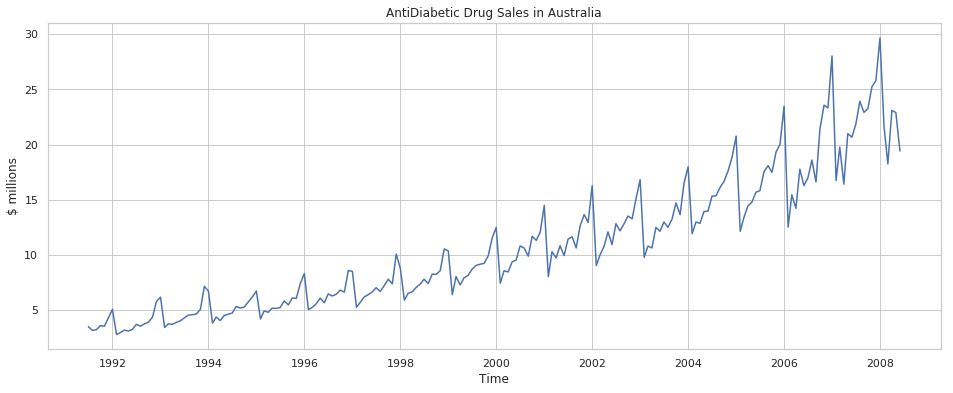

In [6]:
plt.figure(figsize=(16,6))
plt.plot(ts["ds"],ts["y"])
plt.xlabel("Time")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia")

# Insights - Time-Plot:
There is a clear and increasing trend.
There is also a strong seasonal pattern that increases in size as the level of the series increases.
The sudden drop at the start of each year is caused by a government subsidisation scheme that makes it cost-effective for patients to stockpile drugs at the end of the calendar year.
Any forecasts of this series would need to capture the seasonal pattern, and the fact that the trend is changing slowly.

# Stacked Line Charts
These are another way of viewing the time-series data
Here we have kept month on x-axis, revenue on y-axis and year on color.

In [7]:
ts["year"] = ts["ds"].dt.year
ts["month"] = ts["ds"].dt.strftime('%b')
ts.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


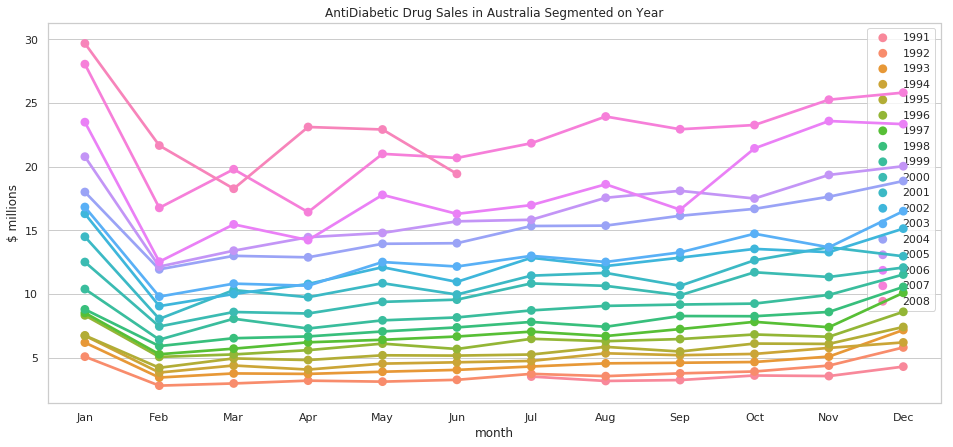

In [8]:
plt.figure(figsize=(16,7))
sns.pointplot(x="month",y="y", hue="year", data=ts,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia Segmented on Year")
plt.legend(loc='upper right')

# Insights-Seasonal Plot¶
There is a large jump in sales in January each year.
The graph also shows that there was an unusually small number of sales in March 2008 (most other years show an increase between February and March).
The small number of sales in June 2008 is probably due to incomplete counting of sales at the time the data were collected.

# Box Plots¶
A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. - It does not show a distribution in as much detail as a stem and leaf plot or histogram does, but is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set.
Box and whisker plots are also very useful when large numbers of observations are involved and when two or more data sets are being compared.

/home/ritu/my_project_dir/my_project_env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ritu/my_project_dir/my_project_env/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'AntiDiabetic Drug Sales in Australia')

<Figure size 1152x504 with 0 Axes>

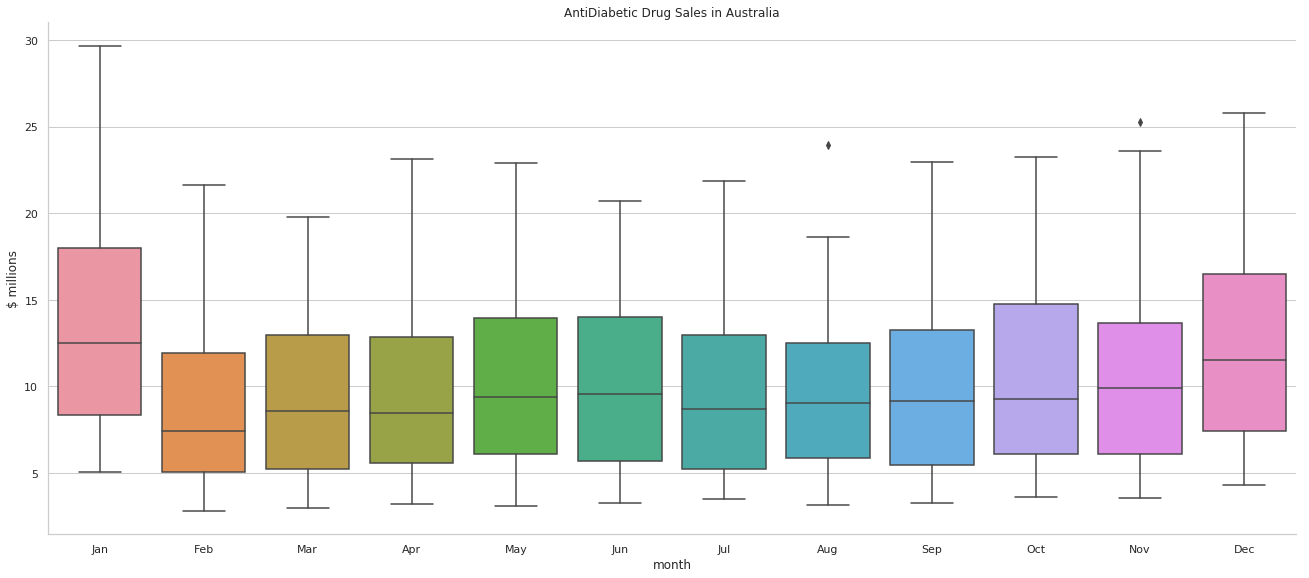

In [9]:
plt.figure(figsize=(16, 7))
sns.factorplot(x="month", y="y", data=ts, kind="box",order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'], size=8, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia")

# LAGPLOTS
A lag plot checks whether a data set or time series is random or not.
Random data should not exhibit any identifiable structure in the lag plot.
Non-random structure in the lag plot indicates that the underlying data are not random

In [16]:
from pandas.tools.plotting import lag_plot
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts["y"], lag=count, ax=axes[i, j])
        count+=1

ModuleNotFoundError: No module named 'pandas.tools'

# AutoCorrelation in Data 
- An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.
- Similar to lagplots but Quatifies(correlation) each lagplot shown above and present all of them in one single plot. 

In [17]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(ts["y"])

ModuleNotFoundError: No module named 'pandas.tools'

# Decomposing Time-Series Data 

White Noise
A time series is white noise if the variables are independent and identically distributed with a mean of zero.
All variables have same variance and each value has a zero correlation with all other values in the series.
If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.
Is your Time Series White noise?
Your time series is not white noise if any of the following conditions are true:

Does your series have a zero mean?
Does the variance change over time?
Do values correlate with lag values?
What to do?
Check the mean and variance over a period of time by taking different intervals
create a correlogram and check for any autocorrelation with lag variables

# Question¶
Generate a White Noise using Guassian Distribution with mean 0 and standard deviation 1.0
Generate summary of the data
Plot the the above time-series.
Plot a histogram of the series.
Plot and check for Autocorrelation using lag variables

# Random Walk
How do you know your time series problem is predictable?

Is your time series a random walk?

The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.

Draw a correllogram of Auto-correlations. check if there is any correlation with the lag variable
Make the data stationary(Discussed later) and check if there is any correlation with the lag variable. if the point one has and the point two doesn't them your data is random walk
The persistence model provides the best source of reliable predictions. (if your baseline models (Naive forecast) are performing well compared to all the models u build, you are dealing with random walk

Question:
Generate A random Walk Series
Plot the above time-series
Draw correllogram
Take first-differencing and check for correllogram

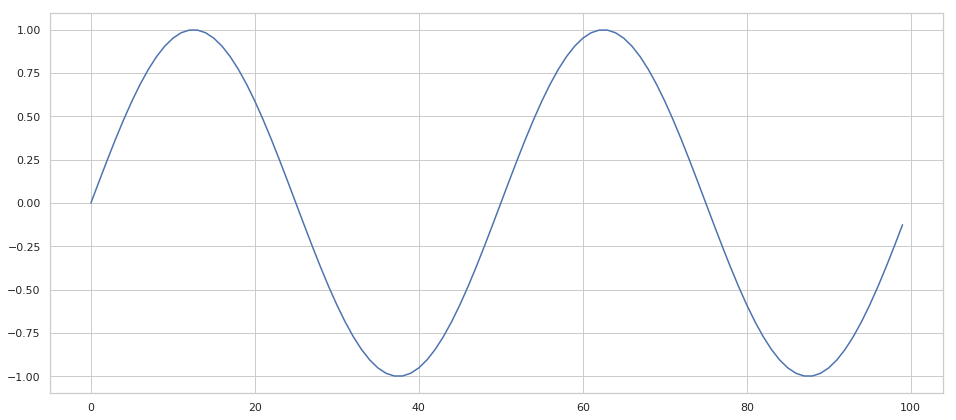

In [18]:
### Generate a Sine curve for 100 samples
Fs = 100
f = 2
sample = 100
x = np.arange(sample)
y1 = np.sin(2 * np.pi * f * x / Fs)
plt.figure(figsize=(16, 7))
plt.plot(x, y1)
plt.show()

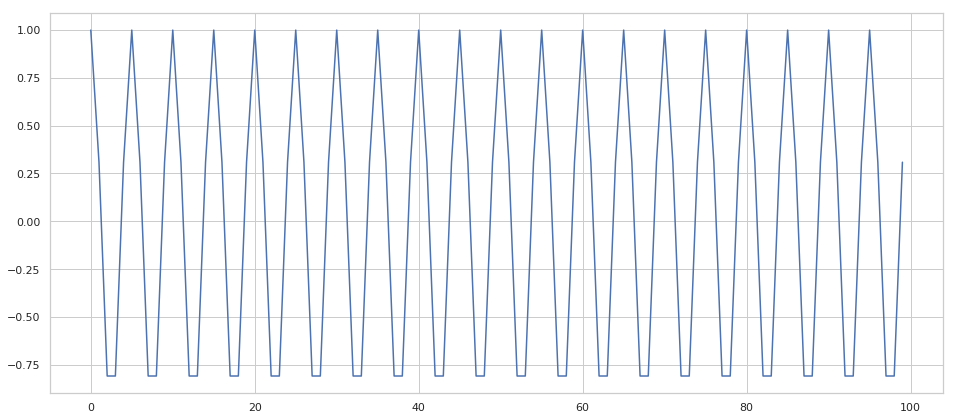

In [19]:
## Generate a cos curve with different frequency
Fs = 100
f = 20
sample = 100
x = np.arange(sample)
y2 = np.cos(2 * np.pi * f * x / Fs)
plt.figure(figsize=(16, 7))
plt.plot(x, y2)
plt.show()

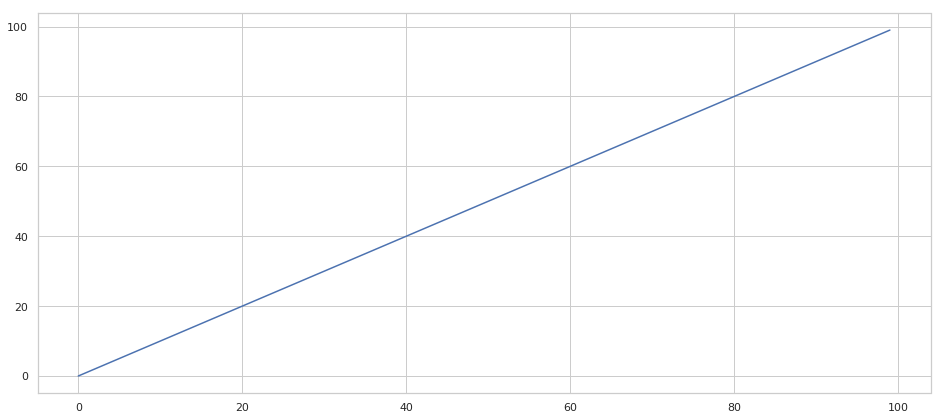

In [12]:
# Generate a Linear Trend line
sample = 100
x = np.arange(sample)
y3 = np.arange(sample)
plt.figure(figsize=(16, 7))
plt.plot(x, y3)
plt.show()

# Combine All the previous plots

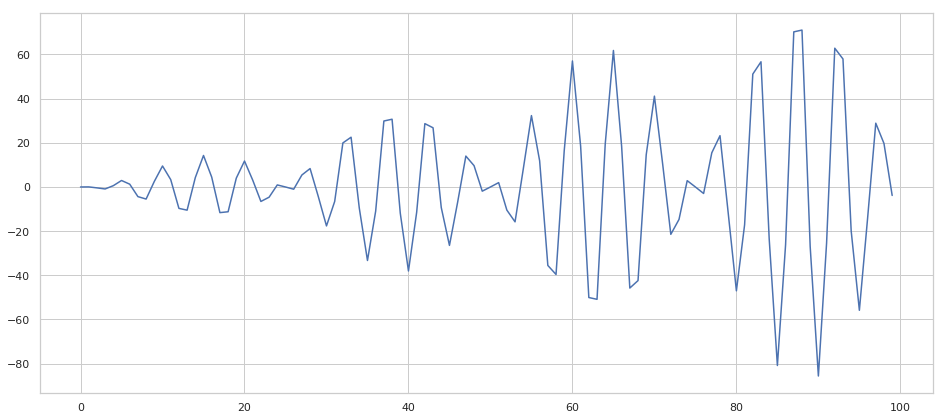

In [20]:
x = np.arange(sample)
y4 = y1*y2*y3
plt.figure(figsize=(16, 7))
plt.plot(x, y4)
plt.show()

# The above graph even if it is generated by harmonic sine, cosine and a Trend line, The resultant graph generated by the combining graphs looks completely irregular.

Time Series Decomposing is simply decomposing this irregular pattern into regular pattern and modelling these individual patterns.

The fundamental idea for time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

Trend – overall direction of the series i.e. upwards, downwards etc.
Seasonality – monthly or quarterly patterns
Cycle – long-term business cycles
Irregular remainder – random noise left after extraction of all the components

## Decomposing your Time Series Data 
<h4>Trend:</h4>
- A trend exists when there is a long-term increase or decrease in the data. 
- It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. 
- There is a trend in the antidiabetic drug sales data.

<h4>Seasonality:</h4>
- A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. 
- Seasonality is always of a fixed and known frequency. 
- The monthly sales of antidiabetic drugs above shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

<h4>Residuals:</h4>
- When you remove the trend, Seasonality and other observable patterns from the data, white noise is left and this termed as residuals.

In [14]:
decompose = ts[["ds", "y"]]
decompose.index = ts["ds"]
decompose = decompose[["y"]]
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


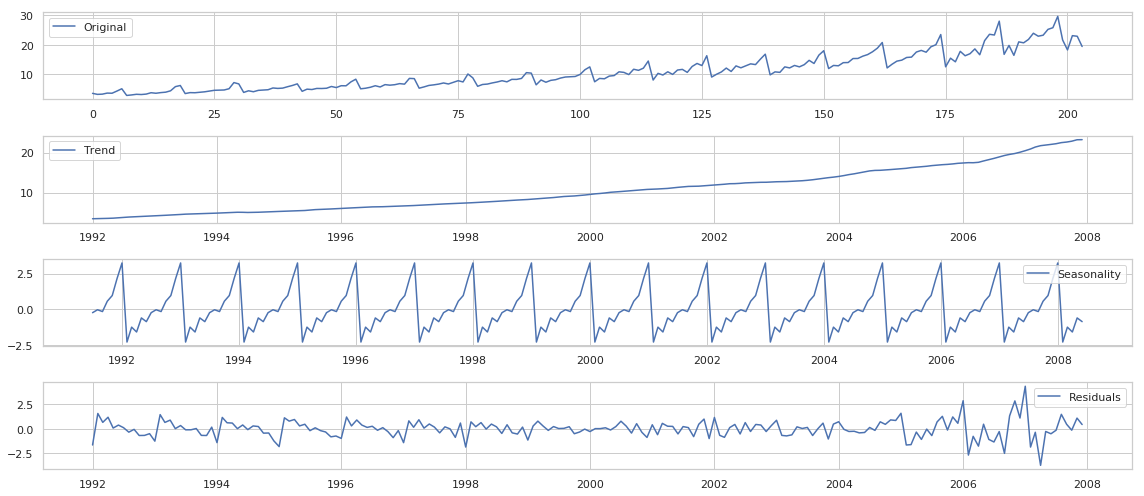

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts["y"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()